In [1]:
!pip install pandas prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 6.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 8.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.8 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Matplotlib is building the font cache; this may take a moment.
/Users/oksjjj/coding/prophet/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('../data/co2-ppm-daily_csv.csv')
df['date']

0        1958-03-30
1        1958-03-31
2        1958-04-02
3        1958-04-03
4        1958-04-04
            ...    
19382    2019-11-19
19383    2019-11-20
19384    2019-11-21
19385    2019-11-22
19386    2019-11-23
Name: date, Length: 19387, dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       1958-03-30
1       1958-03-31
2       1958-04-02
3       1958-04-03
4       1958-04-04
           ...    
19382   2019-11-19
19383   2019-11-20
19384   2019-11-21
19385   2019-11-22
19386   2019-11-23
Name: date, Length: 19387, dtype: datetime64[ns]

In [5]:
df.columns = ['ds', 'y']
df

,ds,y
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09
...,...,...
19382,2019-11-19,410.17
19383,2019-11-20,410.05
19384,2019-11-21,410.49
19385,2019-11-22,410.48


In [6]:
model = Prophet()
model.fit(df)

07:19:30 - cmdstanpy - INFO - Chain [1] start processing
07:19:38 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=365*10)
forecast = model.predict(future)

In [8]:
future

,ds
0,1958-03-30
1,1958-03-31
2,1958-04-02
3,1958-04-03
4,1958-04-04
...,...
23032,2029-11-16
23033,2029-11-17
23034,2029-11-18
23035,2029-11-19


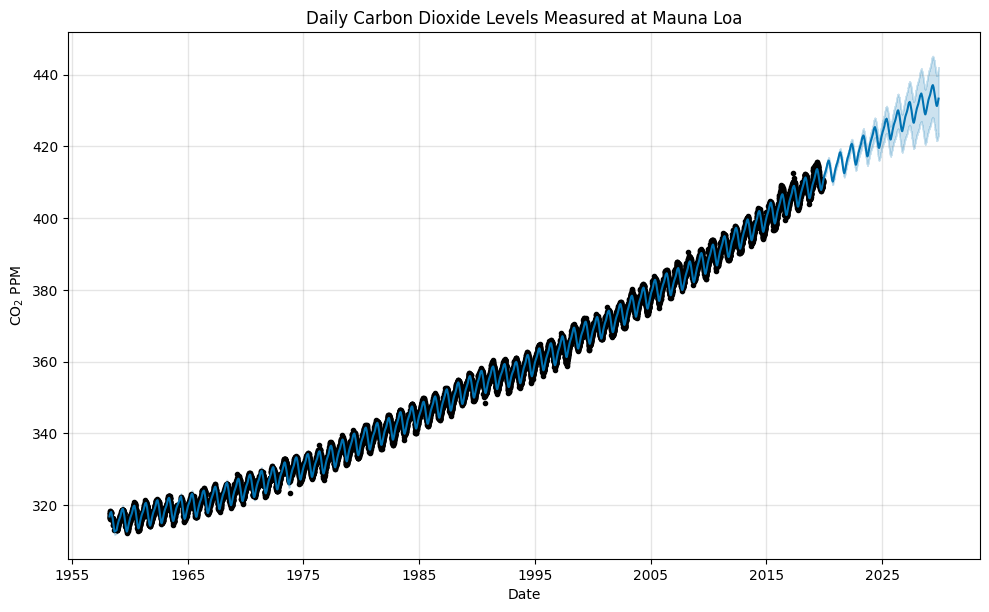

In [9]:
fig = model.plot(forecast, xlabel='Date',
                 ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

In [10]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.868498,314.870913,314.875745
yhat_lower,316.043001,316.025411,316.125484
yhat_upper,317.705929,317.747646,317.847715
trend_lower,314.868498,314.870913,314.875745
trend_upper,314.868498,314.870913,314.875745
additive_terms,1.985672,2.015632,2.118847
additive_terms_lower,1.985672,2.015632,2.118847
additive_terms_upper,1.985672,2.015632,2.118847
weekly,0.003256,-0.010836,0.003465


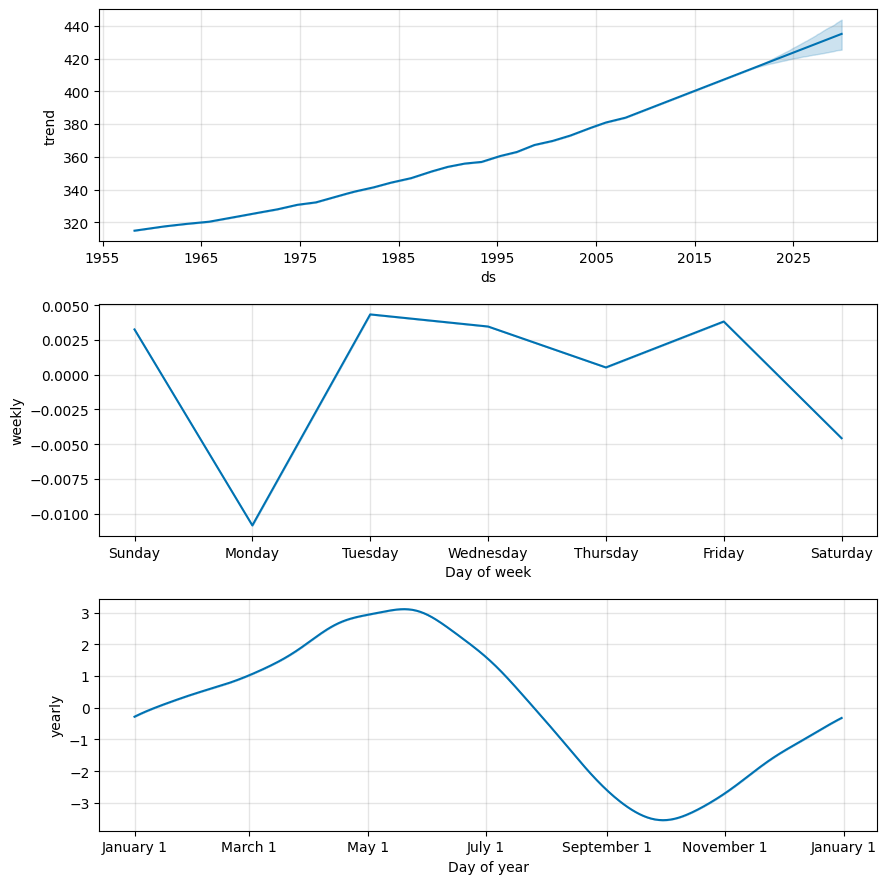

In [11]:
fig2 = model.plot_components(forecast)
plt.show()